In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import sklearn
from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


# Data Loading

In [4]:
df = pd.read_csv('/content/drive/MyDrive/AI/bbc-text.csv')

In [5]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [6]:
target_category = df['category'].unique()
print(target_category)

['tech' 'business' 'sport' 'entertainment' 'politics']


In [7]:
df['categoryId']= df['category'].factorize()[0]

In [8]:
df.head(10)

,category,text,categoryId
0,tech,tv future in the hands of viewers with home th...,0
1,business,worldcom boss left books alone former worldc...,1
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,3
5,politics,howard hits back at mongrel jibe michael howar...,4
6,politics,blair prepares to name poll date tony blair is...,4
7,sport,henman hopes ended in dubai third seed tim hen...,2
8,sport,wilkinson fit to face edinburgh england captai...,2
9,entertainment,last star wars not for children the sixth an...,3


# Data Preprocessing

In [9]:
category = df[["category","categoryId"]].drop_duplicates().sort_values('categoryId')
category

,category,categoryId
0,tech,0
1,business,1
2,sport,2
4,entertainment,3
5,politics,4


In [10]:
df.groupby('category').categoryId.count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: categoryId, dtype: int64

<Axes: xlabel='category'>

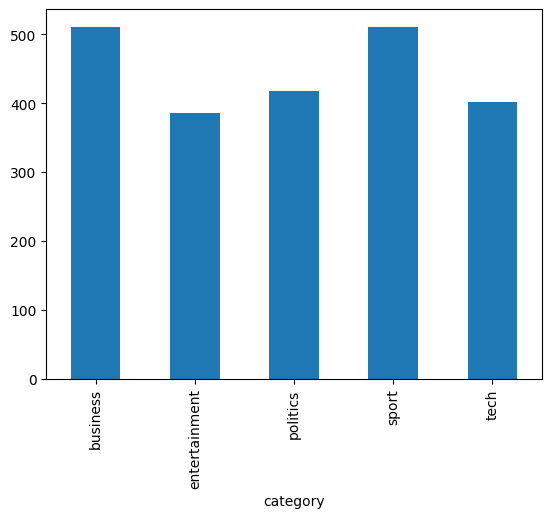

In [11]:
#Analyzing data
df.groupby('category').categoryId.count().plot.bar(ylim=0)

In [12]:
text = df["text"]
text.head(n=25)

0     tv future in the hands of viewers with home th...
1     worldcom boss  left books alone  former worldc...
2     tigers wary of farrell  gamble  leicester say ...
3     yeading face newcastle in fa cup premiership s...
4     ocean s twelve raids box office ocean s twelve...
5     howard hits back at mongrel jibe michael howar...
6     blair prepares to name poll date tony blair is...
7     henman hopes ended in dubai third seed tim hen...
8     wilkinson fit to face edinburgh england captai...
9     last star wars  not for children  the sixth an...
10    berlin cheers for anti-nazi film a german movi...
11    virgin blue shares plummet 20% shares in austr...
12    crude oil prices back above $50 cold weather a...
13    hague  given up  his pm ambition former conser...
14    moya emotional after davis cup win carlos moya...
15    s korean credit card firm rescued south korea ...
16    howard backs stem cell research michael howard...
17    connors boost for british tennis former wo

In [13]:
def preprocessDataset(train_text):
       
    #word tokenization using text-to-word-sequence
    train_text= str(train_text)
    tokenized_train_set = text_to_word_sequence(train_text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=" ")
        
    #stop word removal
    stop_words = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenized_train_set if not i in stop_words]
        
     
    #join words into sentence
    stopwordremove_text = ' '.join(stopwordremove)
        
        
    #remove numbers
    numberremove_text = ''.join(c for c in stopwordremove_text if not c.isdigit())
    #--Stemming--
    stemmer= PorterStemmer()

    stem_input=nltk.word_tokenize(numberremove_text)
    stem_text=' '.join([stemmer.stem(word) for word in stem_input])
    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    lem_input = nltk.word_tokenize(stem_text)
    lem_text= ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lem_input])
    return lem_text

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')


from tensorflow import keras
df['text'] = df['text'].apply(preprocessDataset)
text = df['text']
category = df['category']
text.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    tv futur hand viewer home theatr system plasma...
1    worldcom bos left book alon former worldcom bo...
2    tiger wari farrel gambl leicest say rush make ...
3    yead face newcastl fa cup premiership side new...
4    ocean twelv raid box offic ocean twelv crime c...
Name: text, dtype: object

# Splitting data into training set and testing set

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(text,category, test_size = 0.3, random_state = 60,shuffle=True, stratify=category)

# Naive Bayes

In [16]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train,Y_train)

test_predict = nb.predict(X_test)

train_accuracy = round(nb.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

Naive Bayes Train Accuracy Score : 99% 
Naive Bayes Test Accuracy Score  : 97% 

               precision    recall  f1-score   support

         tech       0.99      0.96      0.97       158
     business       0.91      0.99      0.95       107
        sport       0.96      0.94      0.95       127
entertainment       0.99      0.98      0.99       156
     politics       0.97      0.97      0.97       120

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 weighted avg       0.97      0.97      0.97       668



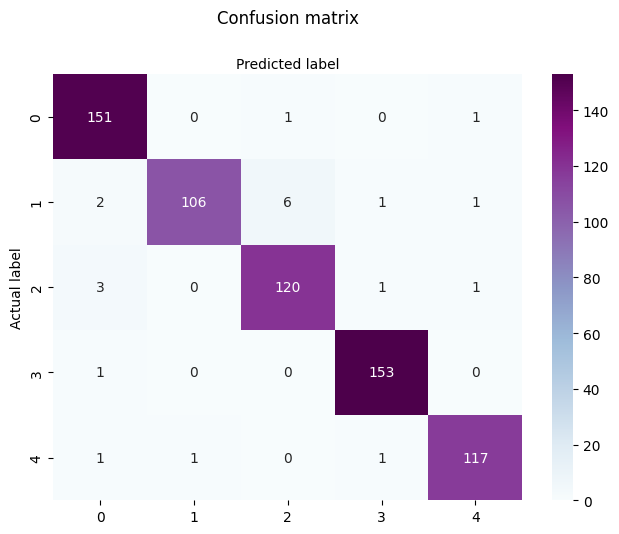

In [17]:
cm = confusion_matrix(Y_test, test_predict)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# SVM

In [18]:
svm = Pipeline([('tfidf', TfidfVectorizer()),
               ('classifier', SVC()),
              ])
svm.fit(X_train,Y_train)

test_predict = svm.predict(X_test)

train_accuracy = round(svm.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)


print("SVC Train Accuracy Score : {}% ".format(train_accuracy ))
print("SVC Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

SVC Train Accuracy Score : 100% 
SVC Test Accuracy Score  : 97% 

               precision    recall  f1-score   support

         tech       0.99      0.96      0.97       158
     business       0.98      0.95      0.97       120
        sport       0.94      0.98      0.96       119
entertainment       0.99      0.99      0.99       154
     politics       0.97      0.99      0.98       117

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 weighted avg       0.98      0.97      0.97       668



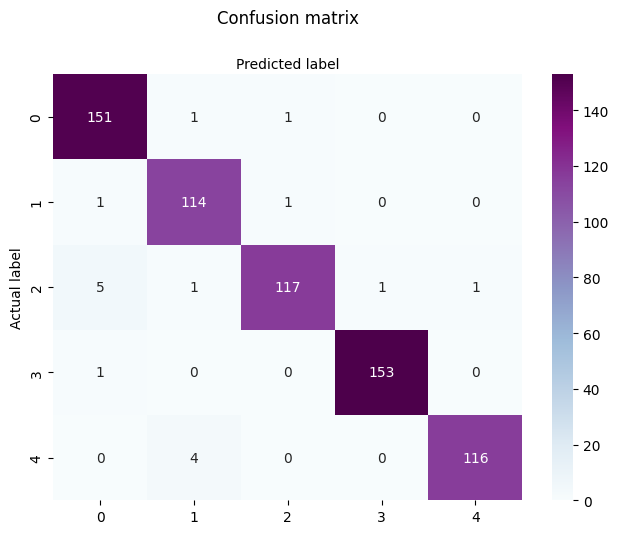

In [19]:
cm = confusion_matrix(Y_test, test_predict)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# KNN

In [20]:
knn = Pipeline([('tfidf', TfidfVectorizer()),
               ('classifier', KNeighborsClassifier(n_neighbors=7)),
              ])
knn.fit(X_train,Y_train)

test_predict = knn.predict(X_test)

train_accuracy = round(knn.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)


print("KNN Train Accuracy Score : {}% ".format(train_accuracy ))
print("KNN Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

KNN Train Accuracy Score : 96% 
KNN Test Accuracy Score  : 93% 

               precision    recall  f1-score   support

         tech       0.91      0.92      0.91       151
     business       0.95      0.93      0.94       118
        sport       0.91      0.90      0.91       126
entertainment       0.96      0.98      0.97       151
     politics       0.94      0.93      0.93       122

     accuracy                           0.93       668
    macro avg       0.93      0.93      0.93       668
 weighted avg       0.93      0.93      0.93       668



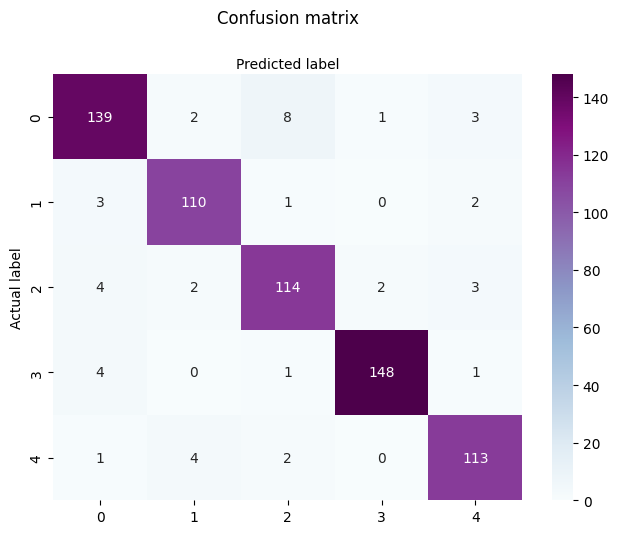

In [21]:
cm = confusion_matrix(Y_test, test_predict)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()